Simple MNIST neural network comparison with and without noise in the data.

Here is an experiment in the impact of noise in data of a simple 3 layer nueral network in training time, speed, and accuracy. This network will be trained on the NMIST dataset with and without noise. The results will be compared  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

Downloading and seperating data

In [2]:
print("\nLoading data...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, x_test.dtype, y_test.dtype)


Loading data...
(60000, 28, 28) (60000,) uint8 uint8
(10000, 28, 28) (10000,) uint8 uint8


shuffling the data and creating a validation set

In [3]:
x_train = x_train.reshape(-1, 28*28)/255.0
x_test = x_test.reshape(-1, 28*28)/255.0

shuffle = np.random.permutation(len(x_train))

x_train_ = x_train.take(shuffle[:50000], axis=0)
x_val = x_train.take(shuffle[50000:], axis=0)
x_train = x_train_

y_train_ = y_train.take(shuffle[:50000], axis=0)
y_val = y_train.take(shuffle[50000:], axis=0)
y_train = y_train_

print(x_train.shape, x_val.shape)
print(y_train.shape, np.amin(y_train), np.amax(y_train))

(50000, 784) (10000, 784)
(50000,) 0 9


Initializing the neural network

In [4]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________
None


Training the network

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6770 - accuracy: 0.7943
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3235 - accuracy: 0.9096
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2672 - accuracy: 0.9253
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2373 - accuracy: 0.9330
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9383


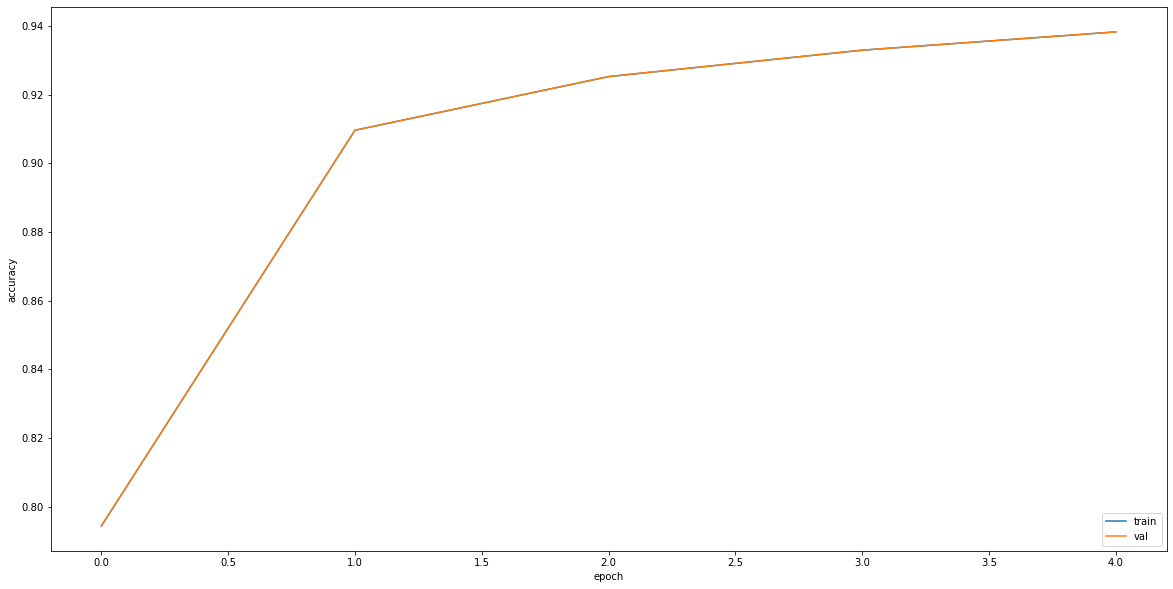

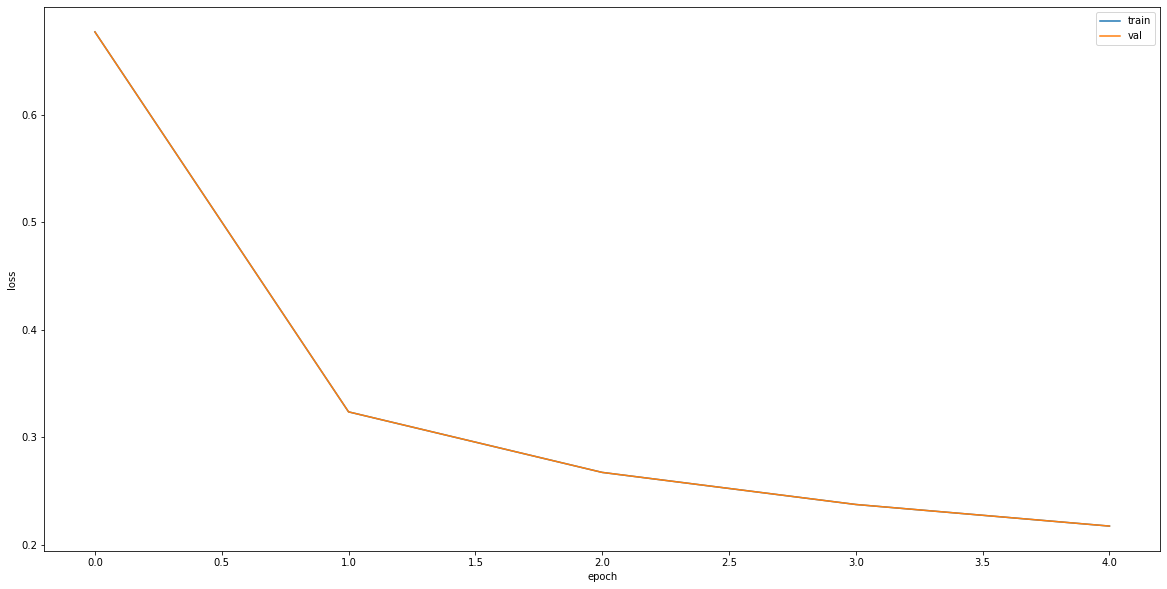

TRAINING SET
Loss: 0.2015065848827362 
Accuracy: 0.9421399831771851

VALIDATION SET
Loss: 0.23588718473911285 
Accuracy: 0.929099977016449

TEST SET
Loss: 0.2265390157699585 
Accuracy: 0.9347000122070312


In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_mnist.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model.load_weights('best_model_mnist.h5')
scores = []
scores.append(model.evaluate(x_train, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

Testing with 2 epochs

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5743 - accuracy: 0.8318
Epoch 2/2
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.9214


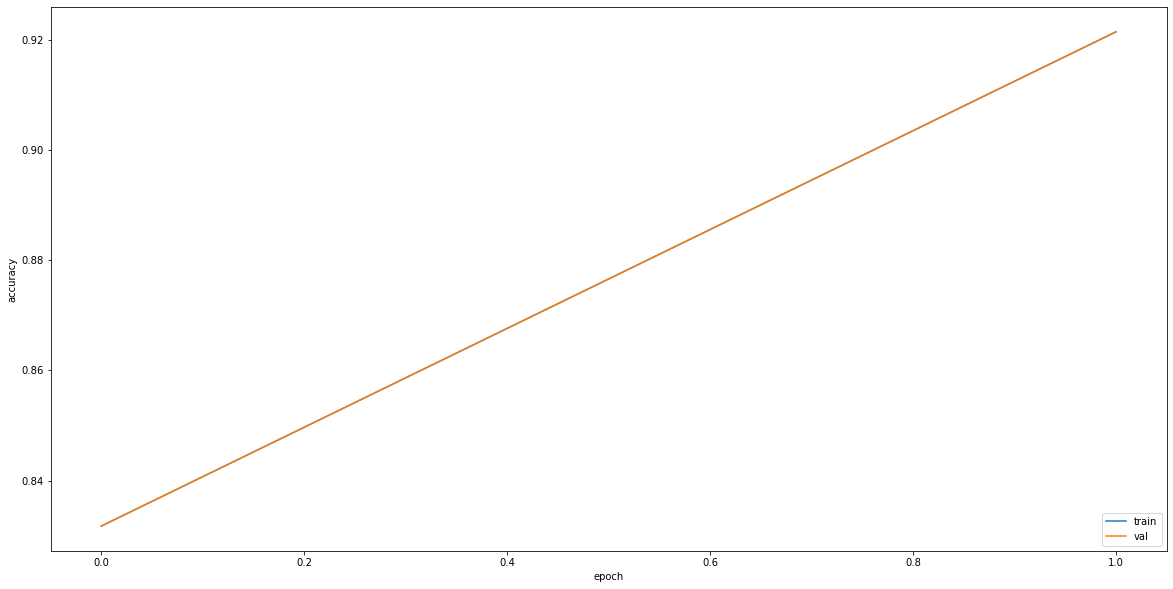

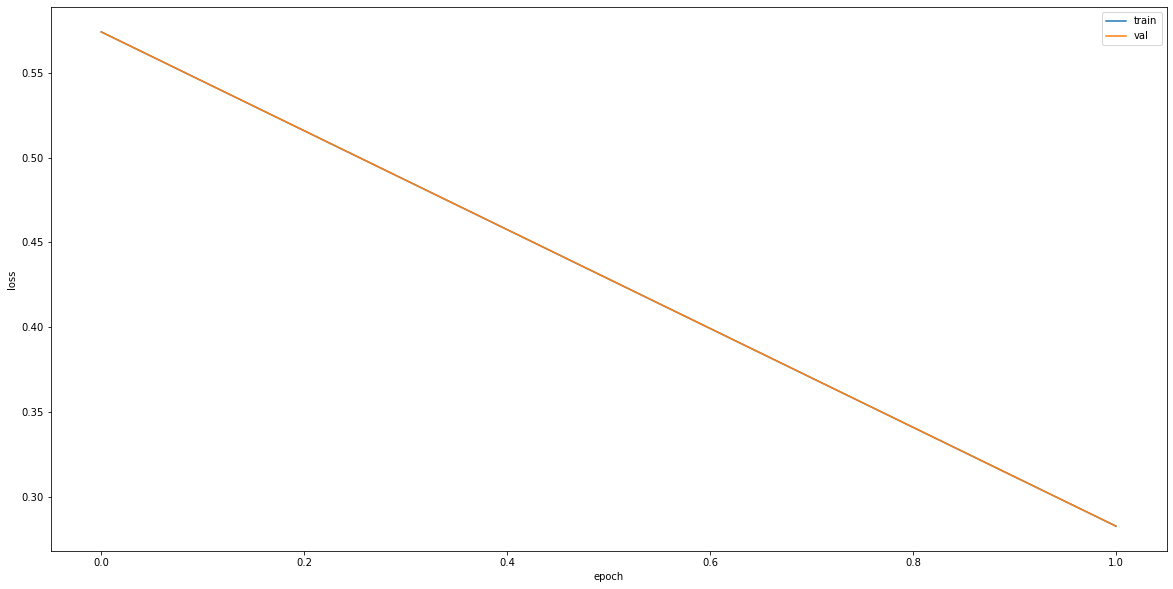

TRAINING SET
Loss: 0.24352607131004333 
Accuracy: 0.9301999807357788

VALIDATION SET
Loss: 0.25829896330833435 
Accuracy: 0.9243000149726868

TEST SET
Loss: 0.24717506766319275 
Accuracy: 0.9279000163078308


In [6]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_mnist.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=2, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training point
model.load_weights('best_model_mnist.h5')

scores.append(model.evaluate(x_train, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 4710      
                                                                 
 dense_7 (Dense)             (None, 10)                70        
                                                                 
Total params: 4,780
Trainable params: 4,780
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7517 - accuracy: 0.7762 - val_loss: 0.4714 - val_accuracy: 0.8669
Epoch 2/2
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4273 - accuracy: 0.8790 - val_loss: 0.3994 - val_accuracy: 0.8856
Epoch 2: early stopping


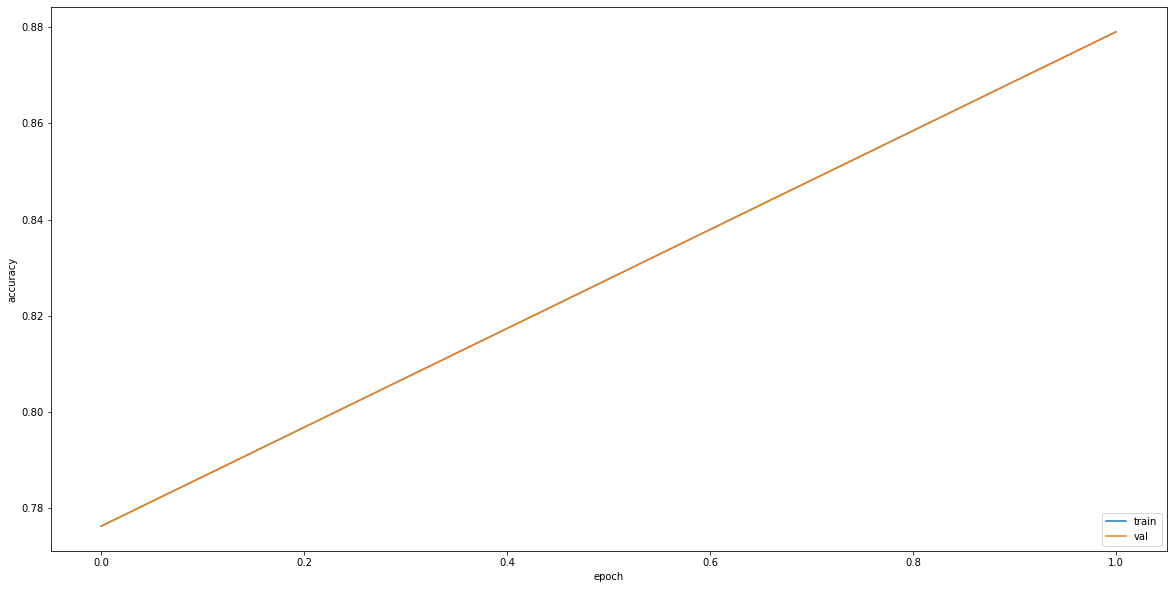

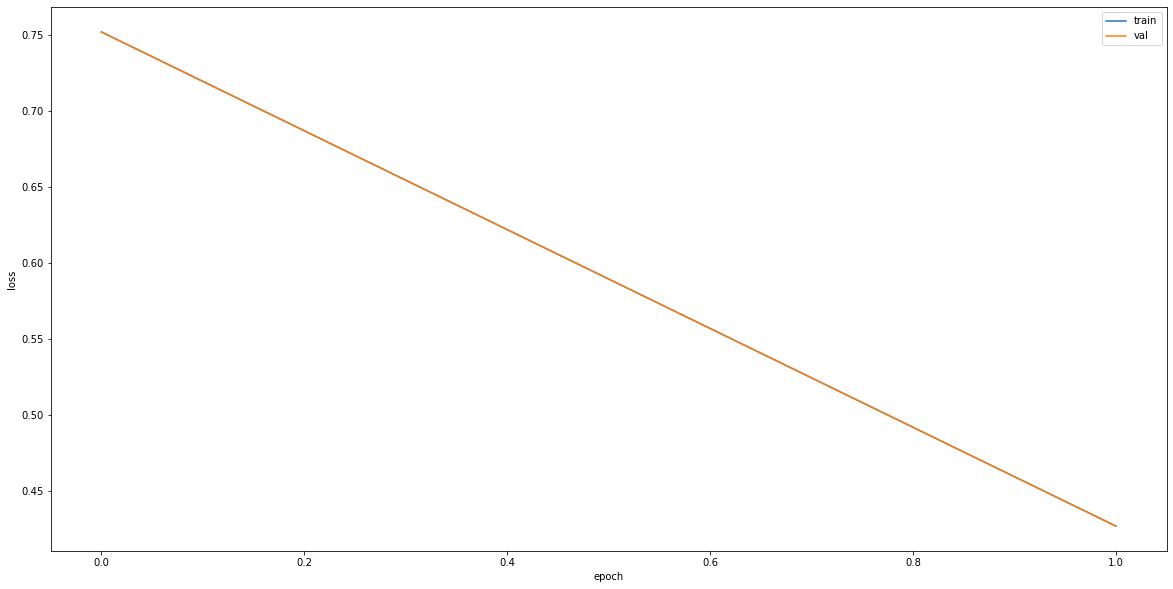

TRAINING SET
Loss: 0.3901163935661316 
Accuracy: 0.8897200226783752

VALIDATION SET
Loss: 0.399353951215744 
Accuracy: 0.8855999708175659

TEST SET
Loss: 0.3862625062465668 
Accuracy: 0.8873999714851379


In [7]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=2, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training model
model.load_weights('best_model.h5')

scores.append(model.evaluate(x_train, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

Printing a sample image for visualization

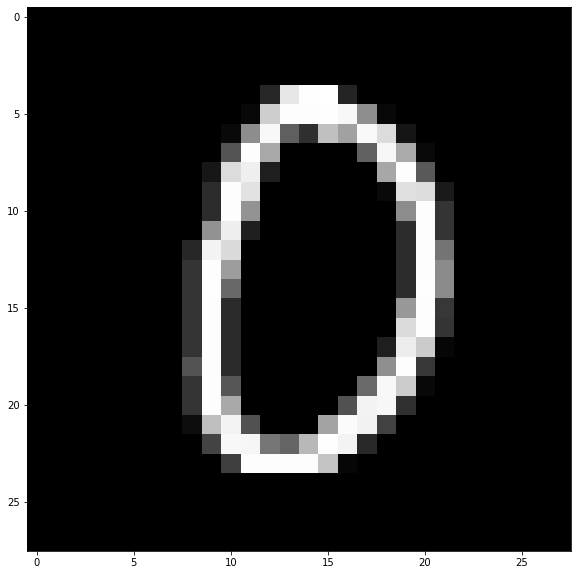

0


In [8]:
n = 445
sample_img = x_train[n]
sample_img = np.array(sample_img, dtype='float')
pix = sample_img.reshape((28,28))
plt.imshow(pix, cmap='gray')
plt.show()
print(y_train[n])



Now the results of experimenting with adding randomness to the dataset and seeing how it impacts performance.
Below is an image for visualization of the noise added to the data.

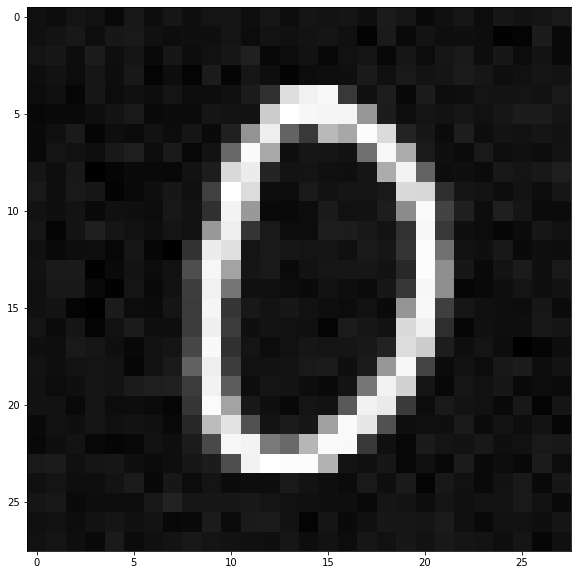

0


In [9]:
x_t = x_train.reshape(-1,28,28)
x_t = np.array(x_t, dtype='float')
x_t = np.random.normal(x_t, 0.025)

sample_img = x_t[n]
#sample_img = np.array(sample_img, dtype='float')
#sample_img = np.random.normal(sample_img, .0002)
#pix = sample_img.reshape((28,28))
plt.imshow(sample_img, cmap='gray')
plt.show()
print(y_train[n])
x_t = x_t.reshape(-1,784)

Reloading the model

In [10]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6738 - accuracy: 0.7870 - val_loss: 0.3489 - val_accuracy: 0.8973
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2950 - accuracy: 0.9155 - val_loss: 0.2789 - val_accuracy: 0.9177
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2444 - accuracy: 0.9290 - val_loss: 0.2536 - val_accuracy: 0.9249
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2191 - accuracy: 0.9367 - val_loss: 0.2380 - val_accuracy: 0.9303
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2012 - accuracy: 0.9410 - val_loss: 0.2234 - val_accuracy: 0.9350


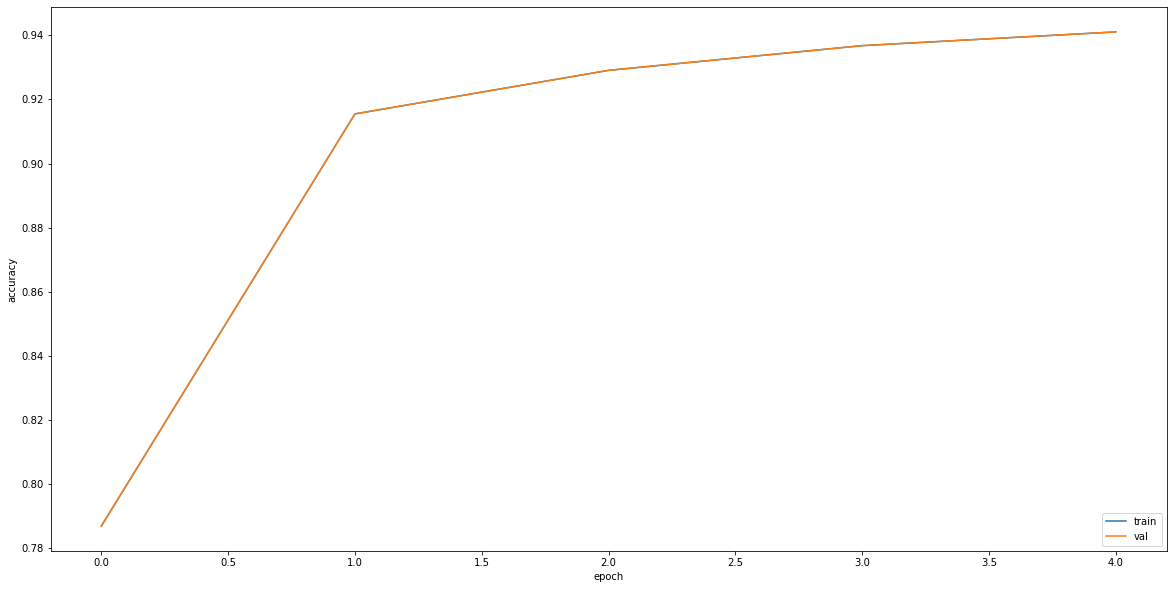

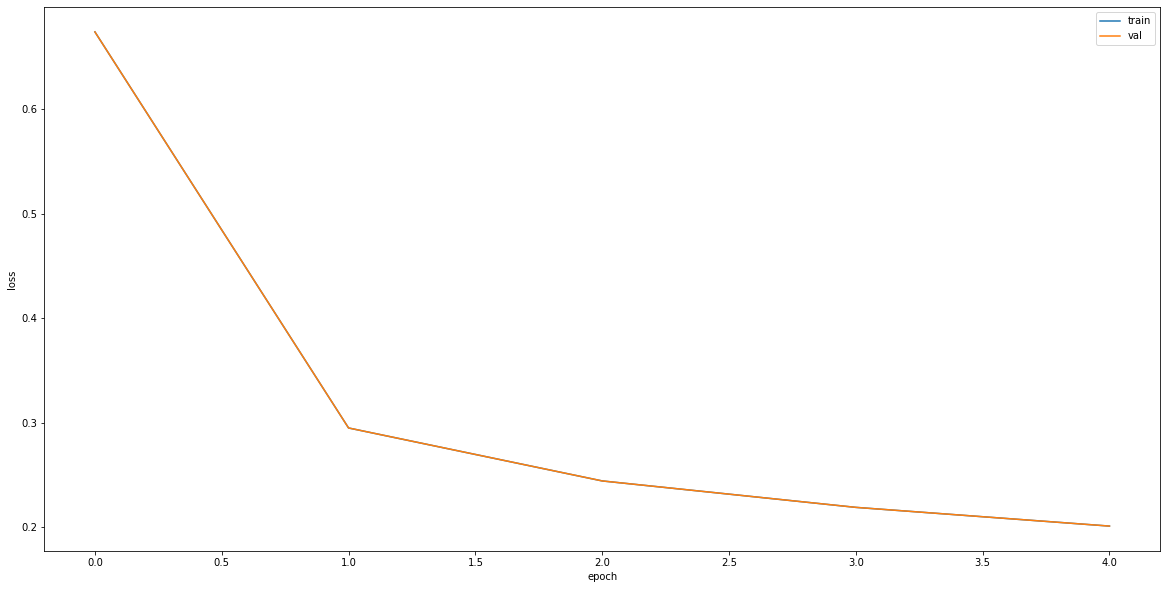

TRAINING SET
Loss: 0.17781074345111847 
Accuracy: 0.9488199949264526

VALIDATION SET
Loss: 0.22344550490379333 
Accuracy: 0.9350000023841858

TEST SET
Loss: 0.21232359111309052 
Accuracy: 0.9379000067710876


In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_t, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=5, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training model
model.load_weights('best_model.h5')

scores.append(model.evaluate(x_t, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

reloading model and rerunning with only 2 epochs.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                12560     
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 10)                90        
                                                                 
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5879 - accuracy: 0.8217 - val_loss: 0.3228 - val_accuracy: 0.9076
Epoch 2/2
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2814 - accuracy: 0.9208 - val_loss: 0.2778 - val_accuracy: 0.9171
Epoch 2: early stopping

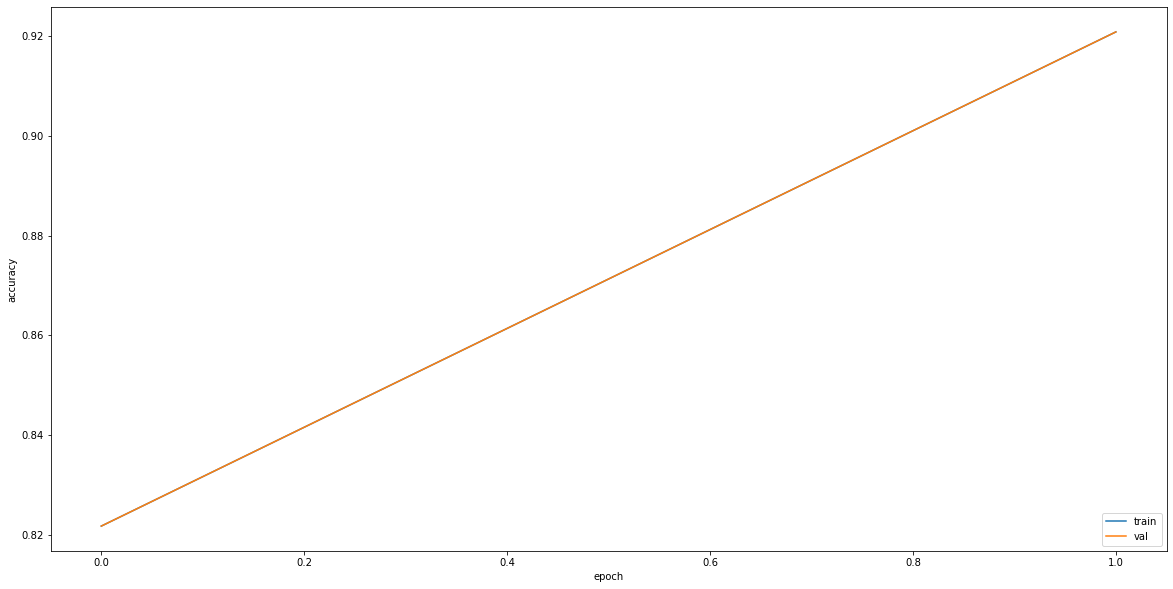

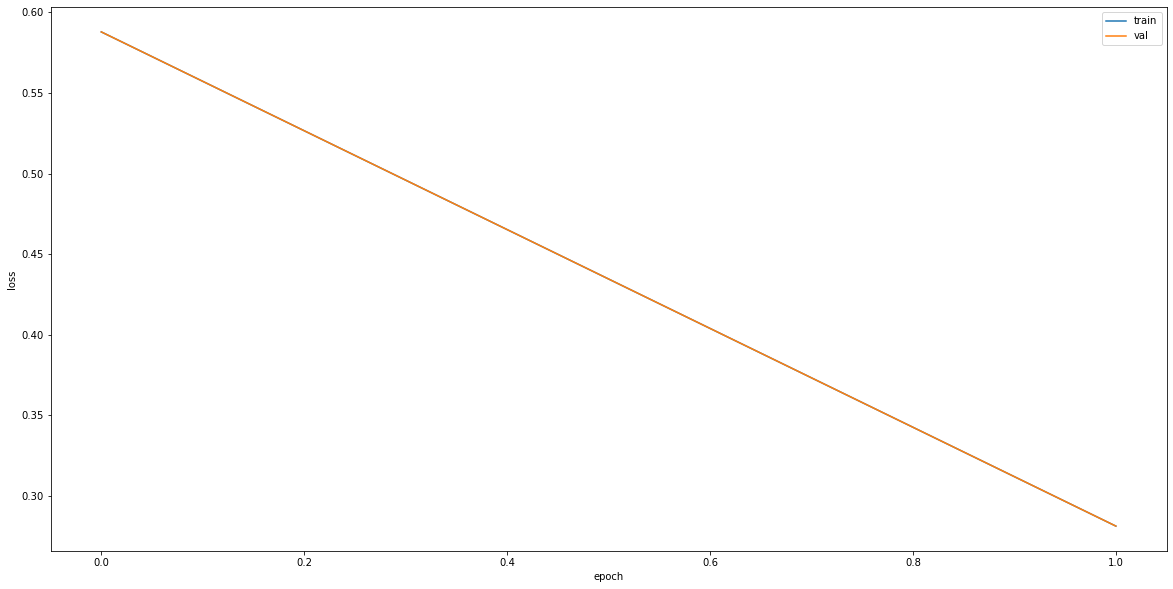

TRAINING SET
Loss: 0.25873082876205444 
Accuracy: 0.9251199960708618

VALIDATION SET
Loss: 0.2778488099575043 
Accuracy: 0.9171000123023987

TEST SET
Loss: 0.27010709047317505 
Accuracy: 0.9199000000953674


In [12]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_t, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=2, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training model
model.load_weights('best_model.h5')

scores.append(model.evaluate(x_t, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 4710      
                                                                 
 dense_15 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,780
Trainable params: 4,780
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8652 - accuracy: 0.7503 - val_loss: 0.5153 - val_accuracy: 0.8569
Epoch 2/2
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4567 - accuracy: 0.8740 - val_loss: 0.4423 - val_accuracy: 0.8760
Epoch 2: early stopping


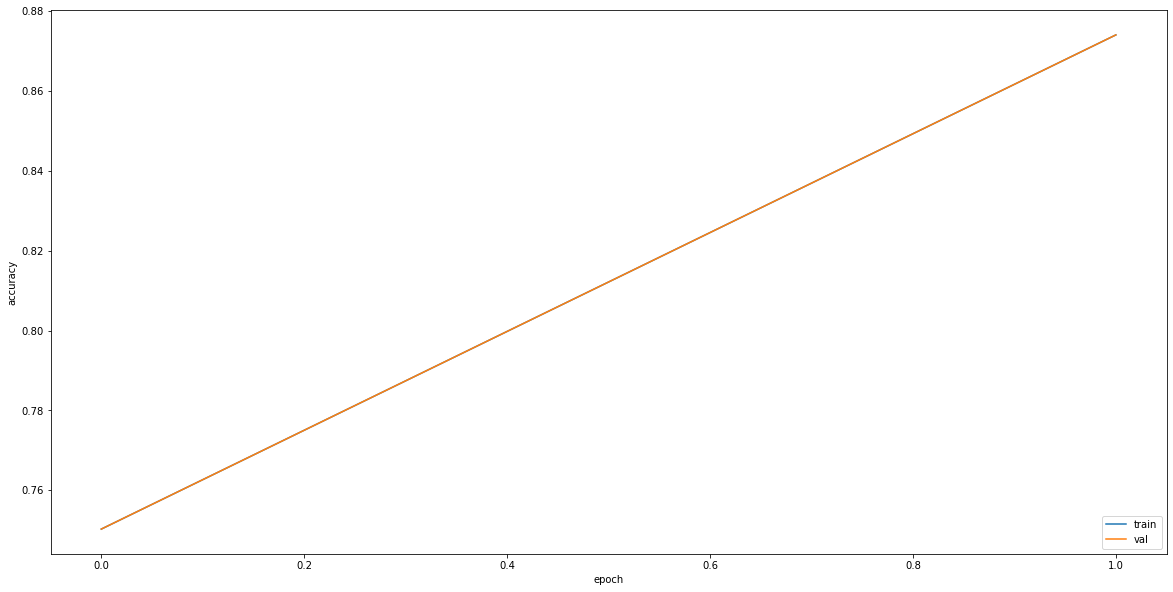

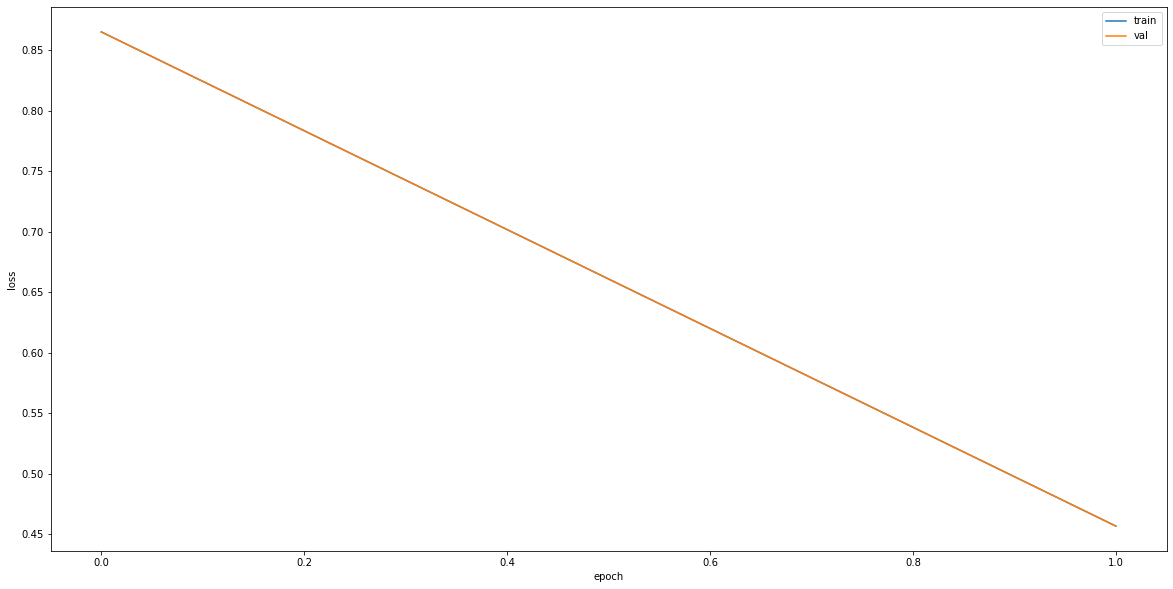

TRAINING SET
Loss: 0.4194076955318451 
Accuracy: 0.883080005645752

VALIDATION SET
Loss: 0.4422990381717682 
Accuracy: 0.8759999871253967

TEST SET
Loss: 0.4130963385105133 
Accuracy: 0.8851000070571899


In [13]:
num_classes = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)

history = model.fit(x_t, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=2, callbacks=[early_stop, model_save], verbose=1)

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# restore weights from the best training model
model.load_weights('best_model.h5')

scores.append(model.evaluate(x_t, y_train, verbose=0))
print('TRAINING SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_val, y_val, verbose=0))
print('\nVALIDATION SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

scores.append(model.evaluate(x_test, y_test, verbose=0))
print('\nTEST SET\nLoss:', scores[-1][0], '\nAccuracy:', scores[-1][1])

Results:

In [17]:
print("Test set results:")
print("        12K params 5 epochs   |  12k params 2 epochs | 5k params 2 epochs")
print("              acc | loss      |       acc | loss     |      acc | loss    ")
print("        ----------------------+----------------------+----------------")
print("no noise   {} | {}    |    {} | {}   |   {} | {}  ".format(round(scores[2][1],4), round(scores[2][0],4), round(scores[5][1],4), round(scores[5][0],4), round(scores[8][1],4), round(scores[8][0],4)))   
print("noise      {} | {}    |    {} | {}   |   {} | {}  ".format(round(scores[11][1],4), round(scores[11][0],4), round(scores[14][1],4), round(scores[14][0],4), round(scores[17][1],4), round(scores[17][0],4)))

Test set results:
        12K params 5 epochs   |  12k params 2 epochs | 5k params 2 epochs
              acc | loss      |       acc | loss     |      acc | loss    
        ----------------------+----------------------+----------------
no noise   0.9347 | 0.2265    |    0.9279 | 0.2472   |   0.8874 | 0.3863  
noise      0.9379 | 0.2123    |    0.9199 | 0.2701   |   0.8851 | 0.4131  


Results:
Adding randomness made little to no impact for the neural network. All differences between training results are marginal. The lack of a difference is because of the different model and training mechanism as to an LDA model in comparison. Where an LDA model sees improvments when adding noise a simple neural network shows no impact.